# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set,  which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.  

## Objectives
You will be able to:
* Show mastery of the content covered in this section

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [7]:
#Load data

df = pd.read_csv('/Users/miyakusumoto/Coursework/boston_housing/train.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [9]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


The crime rate per capita has a mean of 3.36 and a median of 0.26. This leads me to wonder if there are a significant number of outliers in the crime rate information. The median may be more representative in this case. 

The rm series is interesting because the mean is 6.26, with a minimum of 3.56 and maximum of 8.73. This means that in all of the towns are observing, the average number of rooms is above 3. 

Student teacher ratio is interesting as well. The minimum is 12.6 meaning there are 12 students to 1 teacher. The maximum is 21 which means 21 students to 1 teacher. 

In [27]:
#Properties next to the Charles River
df1 = df.loc[df["chas"]==1]
df2 = df.loc[df["chas"]==0]

df1.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,20.000000,20.000000,20.000000,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,255.600000,2.163972,8.500000,12.330000,1.0,0.593595,6.577750,75.815000,3.069540,9.900000,394.550000,17.38500,380.681000,11.118000,30.175000
std,75.913663,2.885734,21.830688,6.505255,0.0,0.146237,0.814341,22.808638,1.343724,8.534142,171.795005,2.22906,21.661541,7.198281,12.362204
min,143.000000,0.015010,0.000000,1.210000,1.0,0.401000,5.403000,24.800000,1.129600,1.000000,198.000000,13.60000,321.020000,2.960000,13.400000
25%,211.250000,0.200377,0.000000,6.200000,1.0,0.489000,6.111250,58.325000,2.041250,4.750000,276.750000,14.85000,377.565000,5.007500,21.700000
50%,236.000000,0.572070,0.000000,12.240000,1.0,0.528500,6.322500,86.000000,3.080050,5.000000,307.000000,17.40000,390.580000,9.735000,26.050000
75%,302.250000,3.453213,0.000000,18.100000,1.0,0.693500,6.913250,92.925000,4.095200,12.000000,468.750000,19.00000,395.240000,14.775000,37.900000
max,373.000000,8.982960,90.000000,19.580000,1.0,0.871000,8.375000,100.000000,5.885000,24.000000,666.000000,20.20000,396.900000,26.820000,50.000000


In [14]:
df2.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,313.000000,313.000000,313.000000,313.000000,313.0,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,250.654952,3.436787,10.829073,11.227252,0.0,0.554815,6.245674,67.741534,3.750853,9.616613,410.220447,18.515974,358.110511,12.604728,22.295527
std,151.365227,7.544289,22.754198,7.032974,0.0,0.112555,0.693026,28.400933,2.009606,8.768386,171.014186,2.132487,88.984202,7.061663,8.746397
min,1.000000,0.006320,0.000000,0.740000,0.0,0.385000,3.561000,6.000000,1.137000,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,118.000000,0.078750,0.000000,4.950000,0.0,0.453000,5.879000,43.700000,2.132900,4.000000,281.000000,17.400000,376.700000,7.220000,17.200000
50%,245.000000,0.245220,0.000000,9.690000,0.0,0.538000,6.185000,76.500000,3.092300,5.000000,330.000000,19.100000,392.230000,11.220000,21.200000
75%,387.000000,3.678220,12.500000,18.100000,0.0,0.624000,6.563000,93.800000,5.214600,24.000000,666.000000,20.200000,396.330000,16.440000,24.700000
max,506.000000,73.534100,100.000000,27.740000,0.0,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [16]:
df_bl = df.loc[df["black"]>= 359]
df_bl.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,235.507299,2.160570,12.406934,10.059489,0.062044,0.535858,6.358814,64.427737,3.999166,8.251825,378.485401,18.373358,390.508686,11.301569,24.065328
std,144.136617,4.956756,23.732860,6.825214,0.241676,0.105530,0.674370,28.258299,1.987091,7.881360,159.387133,2.074735,8.306807,6.519188,9.045360
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.389000,4.138000,6.000000,1.137000,1.000000,188.000000,13.000000,359.290000,1.730000,5.000000
25%,108.250000,0.066232,0.000000,4.490000,0.000000,0.448000,5.963500,40.325000,2.371575,4.000000,270.000000,17.400000,388.450000,6.537500,19.100000
50%,230.500000,0.169400,0.000000,7.870000,0.000000,0.512500,6.247000,69.650000,3.584950,5.000000,307.000000,18.600000,393.680000,9.770000,22.450000
75%,343.750000,0.954332,20.000000,18.100000,0.000000,0.605000,6.645500,91.150000,5.401000,8.000000,432.000000,20.200000,396.900000,14.635000,26.975000
max,506.000000,38.351800,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [17]:
df_nbl = df.loc[df["black"]< 359]
df_nbl.describe()


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,322.677966,8.932164,2.711864,17.024237,0.050847,0.656000,5.832814,85.867797,2.366717,16.050847,552.288136,18.794915,215.302203,18.152712,16.747458
std,144.899185,12.465835,14.601666,4.524048,0.221572,0.105552,0.681489,19.677682,1.284722,9.705000,149.034369,2.468800,129.978795,6.827225,7.194882
min,19.000000,0.019650,0.000000,1.520000,0.000000,0.385000,3.561000,9.800000,1.129600,1.000000,241.000000,12.600000,3.500000,5.500000,7.000000
25%,167.000000,1.974730,0.000000,18.100000,0.000000,0.597000,5.510500,84.200000,1.750850,5.000000,403.000000,18.000000,88.450000,13.130000,11.750000
50%,409.000000,4.752370,0.000000,18.100000,0.000000,0.659000,5.936000,94.000000,2.063500,24.000000,666.000000,20.200000,261.950000,17.150000,15.600000
75%,434.500000,11.242050,0.000000,18.840000,0.000000,0.713000,6.240000,97.300000,2.456650,24.000000,666.000000,20.200000,336.515000,23.265000,20.000000
max,491.000000,73.534100,80.000000,27.740000,1.000000,0.871000,7.107000,100.000000,9.089200,24.000000,711.000000,21.200000,356.990000,36.980000,50.000000


/Users/miyakusumoto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


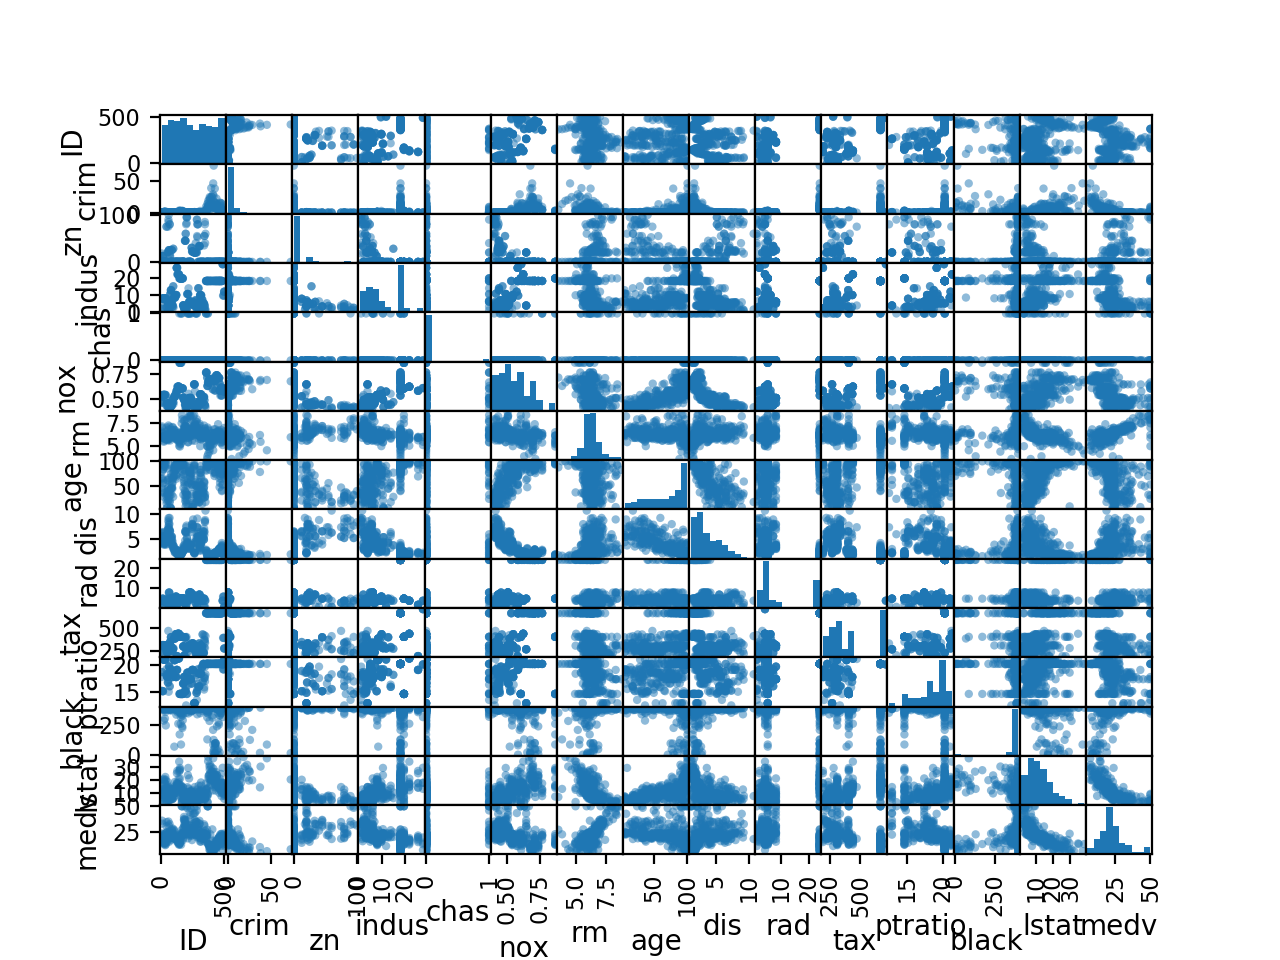

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1200d4eb8>,
      dtype=object)

In [23]:
pd.tools.plotting.scatter_matrix(df)

<IPython.core.display.Javascript object>


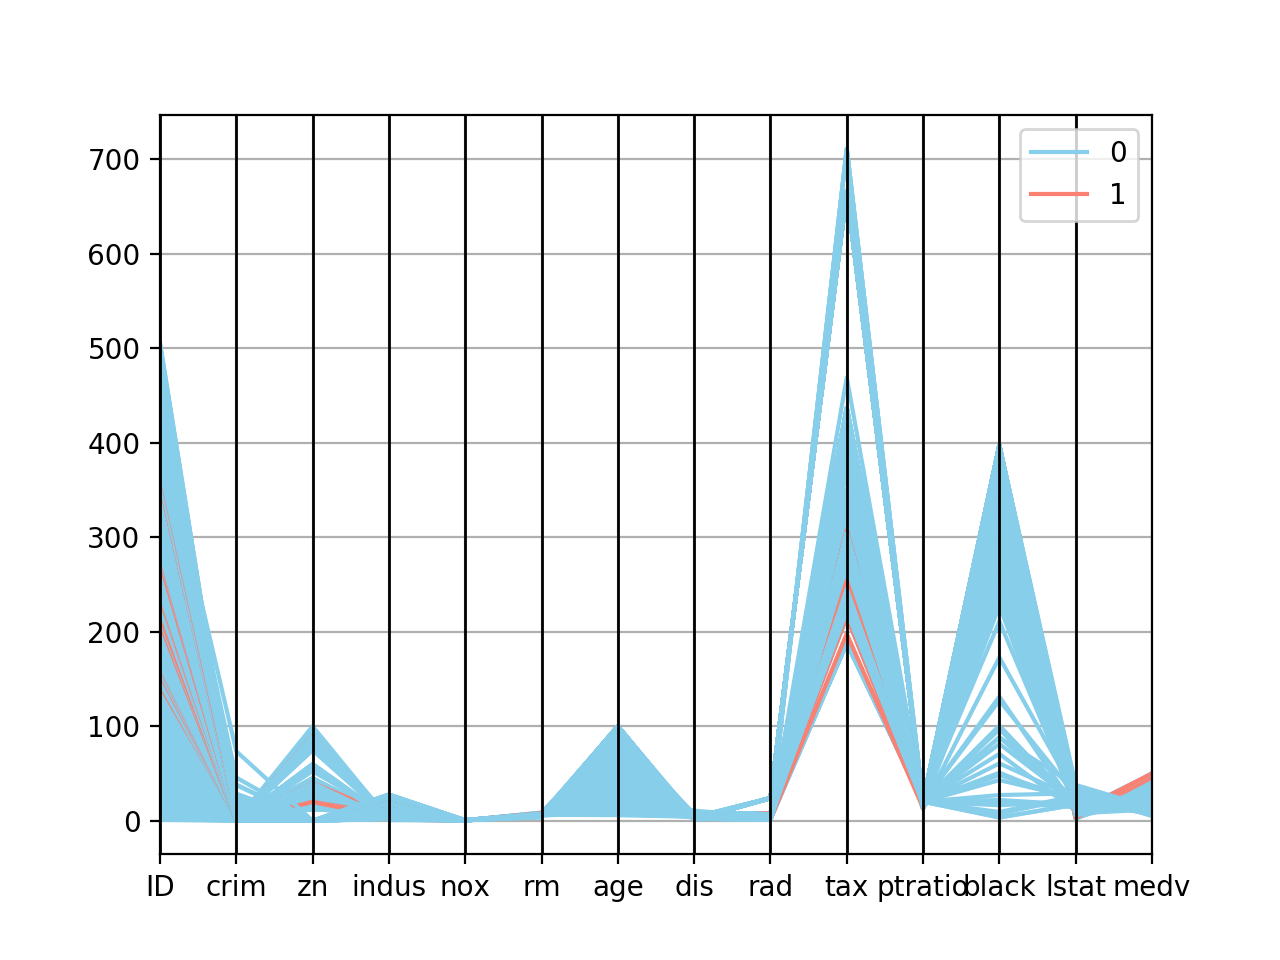

In [24]:
colormap = ("skyblue", "salmon")
plt.figure()
pd.plotting.parallel_coordinates(df, "chas", color = colormap)

<IPython.core.display.Javascript object>


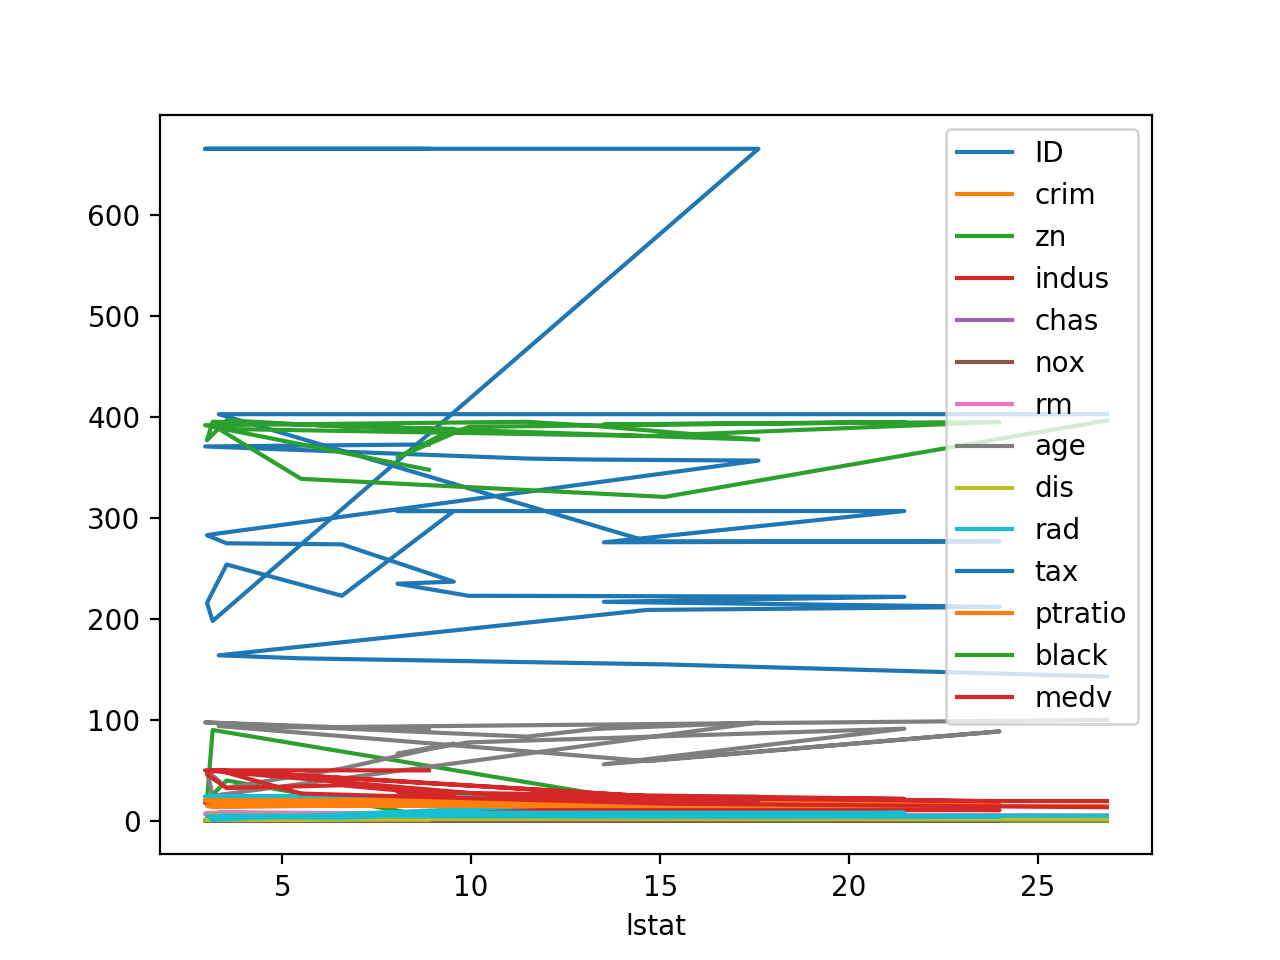

In [34]:
#figure = plt.figure()
#ax1 = figure.add_subplot(121)
#ax2 = figure.add_sublot(122)


<IPython.core.display.Javascript object>


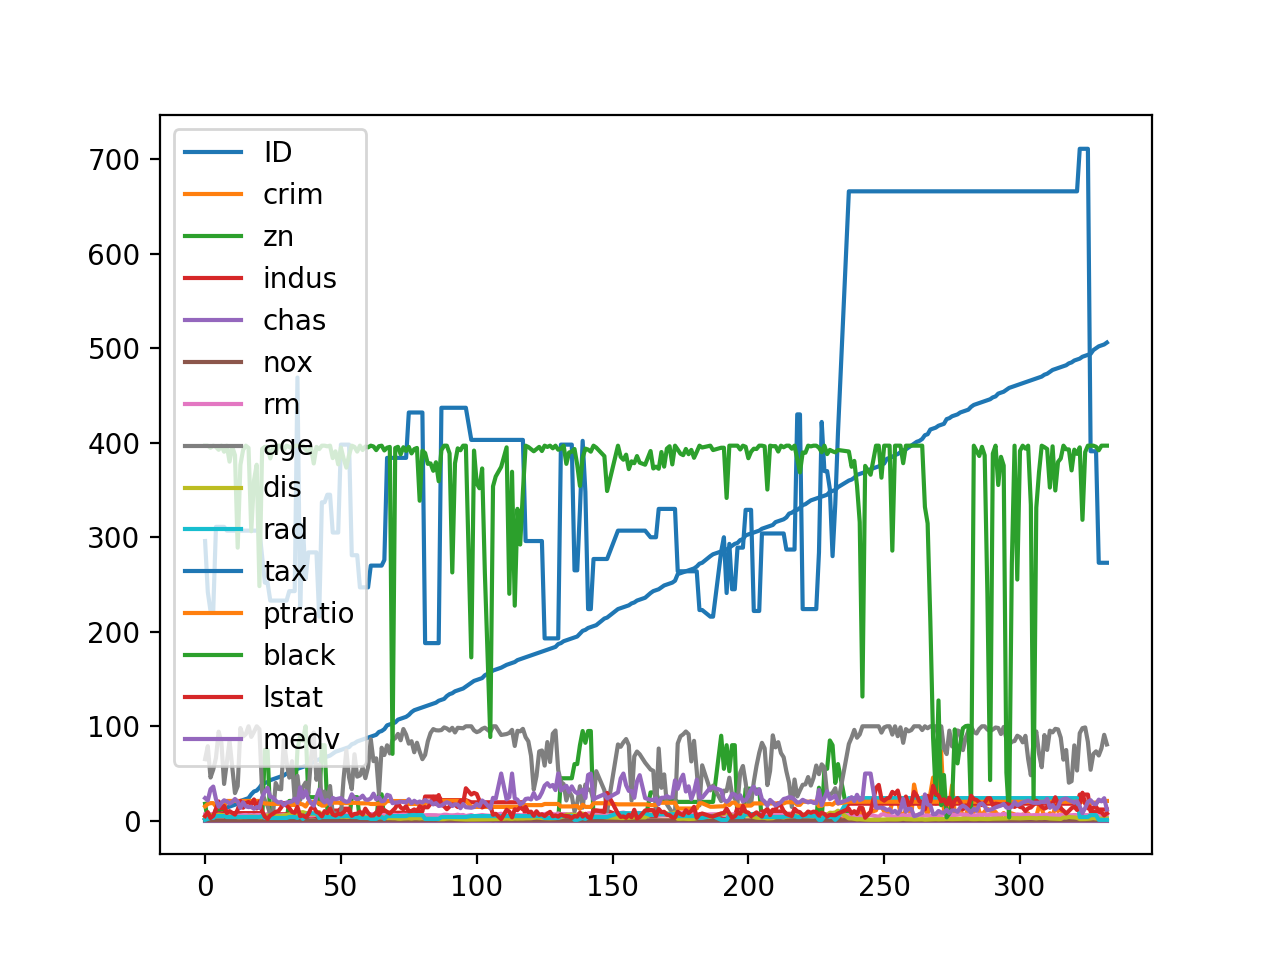

In [29]:
df2.plot()

# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!